In [1]:
import pandas as pd
import seaborn as sns

In [2]:
#Loading the test and training data. We have used the dataset of Amazon Product Reviews
data = 'train.csv'
test_data = 'test.csv'
products = pd.read_csv(data,header=None,names=['Rating','Title','Review'],encoding='utf-8')
products = products[0:100000] #Choosing only first 1000000 rows for the training. We can also randomize it
products = products[["Rating","Review"]]
products.head()

,Rating,Review
0,3,Gave this to my dad for a gag gift after direc...
1,5,I hope a lot of people hear this cd. We need m...
2,5,I'm reading a lot of reviews saying that this ...
3,4,The music of Yasunori Misuda is without questi...
4,5,Probably the greatest soundtrack in history! U...


In [3]:
test_df = pd.read_csv(test_data,header=None,names=['Rating','Title','Review'],encoding='utf-8')
test_df = test_df[0:100000] #Choosing only first 1000000 rows for the training. We can also randomize it
test_df = test_df[["Rating","Review"]]
test_df.head()

,Rating,Review
0,1,"This model may be ok for sedentary types, but ..."
1,4,This is a fast read filled with unexpected hum...
2,2,I bought one of these chargers..the instructio...
3,2,I was excited to find a book ostensibly about ...
4,2,"I am a big JVC fan, but I do not like this mod..."


In [4]:
products = products.dropna()
len(products)

100000

In [5]:
test_df = test_df.dropna()
len(test_df)

100000

In [6]:
products_pos = products[products["Rating"].isin([4,5])]
products_pos.shape

(40147, 2)

In [7]:
products_neg = products[products["Rating"].isin([1,2])]
products_neg.shape

(39295, 2)

In [8]:
products.Rating.value_counts()

3    20558
5    20161
2    20107
4    19986
1    19188
Name: Rating, dtype: int64

<AxesSubplot:>

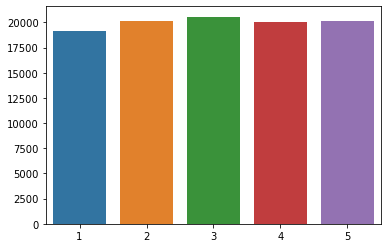

In [9]:
sns.barplot(x=products.Rating.value_counts().index,y=products.Rating.value_counts().values)

In [10]:
products["sentiment"]=1
products["sentiment"][products["Rating"].isin([1,2])]= 0
products.head()
(products['sentiment'].value_counts()[0],products['sentiment'].value_counts()[1])

C:\Users\KIIT\AppData\Local\Temp/ipykernel_17636/3330646074.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  products["sentiment"][products["Rating"].isin([1,2])]= 0


(39295, 60705)

In [11]:
test_df["sentiment"] = 1
test_df["sentiment"][test_df["Rating"].isin([1,2])] = 0
(test_df['sentiment'].value_counts()[0],test_df['sentiment'].value_counts()[1])

C:\Users\KIIT\AppData\Local\Temp/ipykernel_17636/3926341427.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df["sentiment"][test_df["Rating"].isin([1,2])] = 0


(39494, 60506)

In [12]:
X_train = products['Review']
y_train = products["sentiment"]
X_test = test_df["Review"]
y_test = test_df["sentiment"]

In [13]:
X_train.head()

0    Gave this to my dad for a gag gift after direc...
1    I hope a lot of people hear this cd. We need m...
2    I'm reading a lot of reviews saying that this ...
3    The music of Yasunori Misuda is without questi...
4    Probably the greatest soundtrack in history! U...
Name: Review, dtype: object

In [14]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

# Create CountVectorizer with stopword removal
count_vector = CountVectorizer(stop_words=ENGLISH_STOP_WORDS)
ctmTr = count_vector.fit_transform(X_train)
X_test_dtm = count_vector.transform(X_test)

In [15]:
print(count_vector.get_feature_names()[0:20])
print(count_vector.get_feature_names()[-20:])

['00', '000', '00000', '00000000001', '00001', '0001', '000cps', '000fortunately', '000if', '000kb', '000sg', '000th', '001', '002', '00233', '003', '004g', '007', '0070412901', '0072316373']
['épicerie', 'época', 'époque', 'ér', 'ésta', 'éste', 'éstos', 'établir', 'était', 'étoile', 'étoiles', 'étranger', 'été', 'éveil', 'éviter', 'éxitos', 'óld', 'última', 'única', 'único']


C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [16]:
ctmTr.shape

(100000, 107778)

In [17]:
# 1) Multinomial
from sklearn.naive_bayes import MultinomialNB
mul_model = MultinomialNB()
mul_model.fit(ctmTr,y_train)


MultinomialNB()

In [18]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
predictions = dict()

predictions["Multinomial"] = mul_model.predict(X_test_dtm)
accuracy_score(y_test, predictions["Multinomial"])

0.75866

In [19]:
predictions["Multinomial"]

array([0, 1, 0, ..., 1, 1, 0], dtype=int64)

In [20]:
 #2)BernoulliNB
from sklearn.naive_bayes import BernoulliNB
ber_model = BernoulliNB()
ber_model.fit(ctmTr,y_train)

BernoulliNB()

In [21]:
predictions["BernoulliNB"]=ber_model.predict(X_test_dtm)
accuracy_score(y_test,predictions["BernoulliNB"])

0.75986

In [22]:
predictions["BernoulliNB"]

array([0, 1, 0, ..., 1, 1, 0], dtype=int64)

In [23]:
predictions

{'Multinomial': array([0, 1, 0, ..., 1, 1, 0], dtype=int64),
 'BernoulliNB': array([0, 1, 0, ..., 1, 1, 0], dtype=int64)}